In [1]:
import collections
import pathlib

# データ処理周り
import numpy as np
import pandas as pd
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>")) 

# 可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import cm # colormap
import seaborn as sns
%matplotlib inline

# pandasのwarningが邪魔なので
import warnings
warnings.filterwarnings('ignore')

# options
# pd.set_option('display.max_columns', 50)
plt.style.use('ggplot')

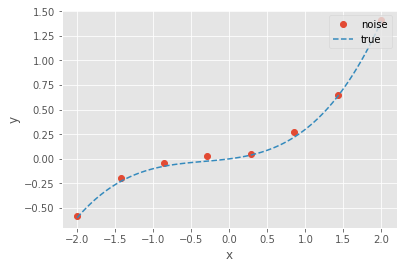

In [2]:
#真の関数
def g(x):
    return 0.1 * (x ** 3 + x ** 2 + x)

#ノイズを加えた学習データを準備

train_x = np.linspace(-2,2,8)
train_y = g(train_x) + np.random.rand(train_x.size) * 0.05
#プロット

x=np.linspace(-2,2,100)
plt.plot(train_x,train_y, "o",label="noise")
plt.plot(x,g(x),linestyle="dashed",label="true")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [3]:
#標準化
mu=train_x.mean(axis=0)
sigma=train_x.std(axis=0)
def standardize(x):
    return (x- mu) / sigma
train_z=standardize(train_x)

#学習データの作成
def to_matrix(x):
    return np.vstack([
        np.ones(x.size),
        x,
        x**2,
        x**3,
        x**4,
        x**5,
        x**6,
        x**7,
        x**8,
        x**9,
        x**10,
    ]).T
X=to_matrix(train_z)


#パラメータの初期化
theta = np.random.randn(X.shape[1])
#予測関数
def f(x):
    return np.dot(x,theta)

## 正則化を適用しない実装

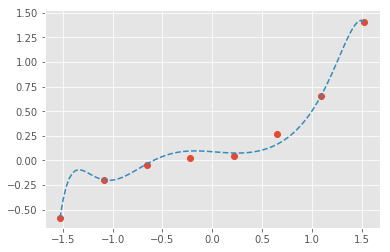

In [7]:

#目的関数
def E(x,y):
    return 0.5 * np.sum((y - f(x)) **2)

#学習率
ETA =1e-4
ETA
#誤差
diff =1

#学習
error = E(X,train_y)
while diff > 1e-6:
    theta = theta - ETA *np.dot(f(X) - train_y, X)
    current_error= E(X,train_y)
    diff = error- current_error
    error = current_error

#結果のプロット
z=standardize(x)
plt.plot(train_z,train_y,"o")
plt.plot(z,f(to_matrix(z)),linestyle="dashed")
plt.show()

いびつな形状のグラフ

## 正則化を適応した実装

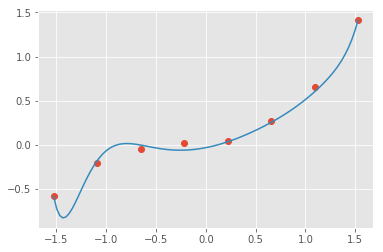

In [8]:
#正則化なしのパラメータを保存
theta1=theta

theta=np.random.randn(X.shape[1])

#正則化定数
LAMBDA=1

#誤差
diff=1

#正則化ありで学習する

error= E(X,train_y)
while diff >1e-6:
    #正則化項。バイアス項は正則化を適用しないので０にする。
    reg_term= LAMBDA * np.hstack([0,theta[1:]])
    #正則化項を利用してパラメータを更新
    theta = theta - ETA *( np.dot(f(X) - train_y, X) +reg_term)
    current_error= E(X,train_y)
    diff = error- current_error
    error = current_error
#結果のプロット
z=standardize(x)
plt.plot(train_z,train_y,"o")
plt.plot(z,f(to_matrix(z)))
plt.show()

## 両方をプロットして確認する

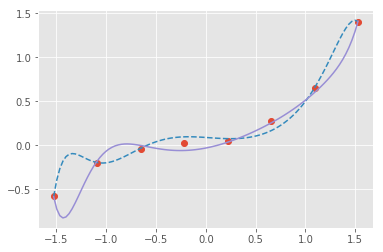

In [9]:
theta2 =theta

plt.plot(train_z,train_y,"o")

#正則化なし
theta = theta1
plt.plot(z,f(to_matrix(z)),linestyle="dashed")

#正則化あり
theta = theta2
plt.plot(z,f(to_matrix(z)))

plt.show()